# Ch03. 배깅과 랜덤 포레스트

**구성**
+ 배깅 앙상블
+ 랜덤 포레스트 살펴보기
+ 랜덤 포레스트 매개변수
+ 랜덤 포레스트 성능 높이기 - 사례연구

## 3.1. 배깅 앙상블

### 3.1.1. 앙상블 방법

**분류기의 앙상블**은 **다수결 투표**로 진행함
+ sklearn 함수 `VotingClassifier` 로 구현 가능

### 3.1.2. 배깅
> 부트스트랩 애그리게이션의 약자

진행방법
1. 전체 데이터에서 부트스트랩 샘플 N개를 L회 추출
2. L개의 데이터 셋을 이용해서, L개의 모델을 구축
3. L개의 모델을 앙상블(애그리게이팅) 하여, 앙상블 분류기 생성

## 3.2. 랜덤 포레스트
+ 랜덤 포레스트의 경우 모델의 분산이 줄어들게 됨
+ 기본적으로 랜덤 포레스트 분류기는 노드를 분할할 때, 특성 개수의 제곱근을 사용함
    + 100개의 특성이 있다면, 10개의 특성만 이용함
    + 따라서, 중복 샘플을 가진 두 트리의 예측이 달라지므로 앙상블이 의미가 있음
+ 노드를 분할할 때, 특성의 최선의 분할 기준을 찾아 분할

### 3.2.1. 랜덤 포레스트 분류 모델

In [5]:
import pandas as pd
# census_cleaned.csv 파일을 로드합니다.
df_census = pd.read_csv('census_cleaned.csv')
df_census.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 데이터를 X와 y로 나눕니다.
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

# 랜덤 포레스트 모델을 생성
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

# 교차 검증을 수행
scores = cross_val_score(rf, X_census, y_census, cv=5)

# 정확도를 출력
print('정확도:', np.round(scores, 3))
print('정확도 평균: %0.3f' % (scores.mean()))

정확도: [0.847 0.848 0.855 0.854 0.853]
정확도 평균: 0.851


### 3.2.2. 랜덤 포레스트 회귀 모델

In [7]:
# bike_rentals_cleaned.csv 파일을 로드합니다.
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [10]:
# RandomForestRegressor를 임포트합니다.
from sklearn.ensemble import RandomForestRegressor

# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 822.698  538.627  528.881  798.944  898.384  959.242  836.593  762.641
  905.953 2252.834]
RMSE 평균: 930.480


## 3.3. 랜덤 포레스트 매개변수

In [13]:
# 아래에서 쓸 데이터 가져오기
import pandas as pd
df_census = pd.read_csv('census_cleaned.csv')
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3.1 oob_score

랜덤 포레스트를 생성하면서, 사용하지 않은 샘플을 이용하여 모델을 평가하는 옵션
+ 랜덤 포레스트를 생성 완료한 후, 샘플 $(x_i, y_i)$가 포함되지 않은 트리들에서 $(x_i, y_i)$를 적합하여 그 결과를 평균 scroing 한 것
+ [공식문서설명](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py)

In [11]:
# oob_score=True로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# oob_score_를 출력합니다.
rf.oob_score_

0.8343109855348423

### 3.3.2. n_estimators
+ 사용할 트리의 개수
+ `default = 100`
    + 데이터셋이 큰 경우 500개 이상 필요할 수 있음

#### n_estimators = 50

In [14]:
# n_estimators=50과 oob_score=True로 RandomForestClassifier를 만듭니다.
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# oob_score_를 출력합니다.
rf.oob_score_

0.8518780135745216

#### n_estimators = 150

In [16]:
# n_estimators=150과 oob_score=True로 RandomForestClassifier를 만듭니다.
rf = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=2, n_jobs=-1)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# oob_score_를 출력합니다.
rf.oob_score_

0.8549184607352354

### 3.3.3. warm_start
랜덤 포레스트의 트리 개수(`n_estimators`)를 결정하는 데 도움이 됨
+ `warm_start = True` 라면, 이전 모델에서 이어서 트리를 추가로 생성하며 앙상블을 진행함

아래는 `warm_start` 매개변수를 이용해, `n_estimators`에 따라 **OOB SCORE**를 나타낸 것
+ 300개를 넘는 트리를 쓰는 것은 큰 도움이 되지 않음

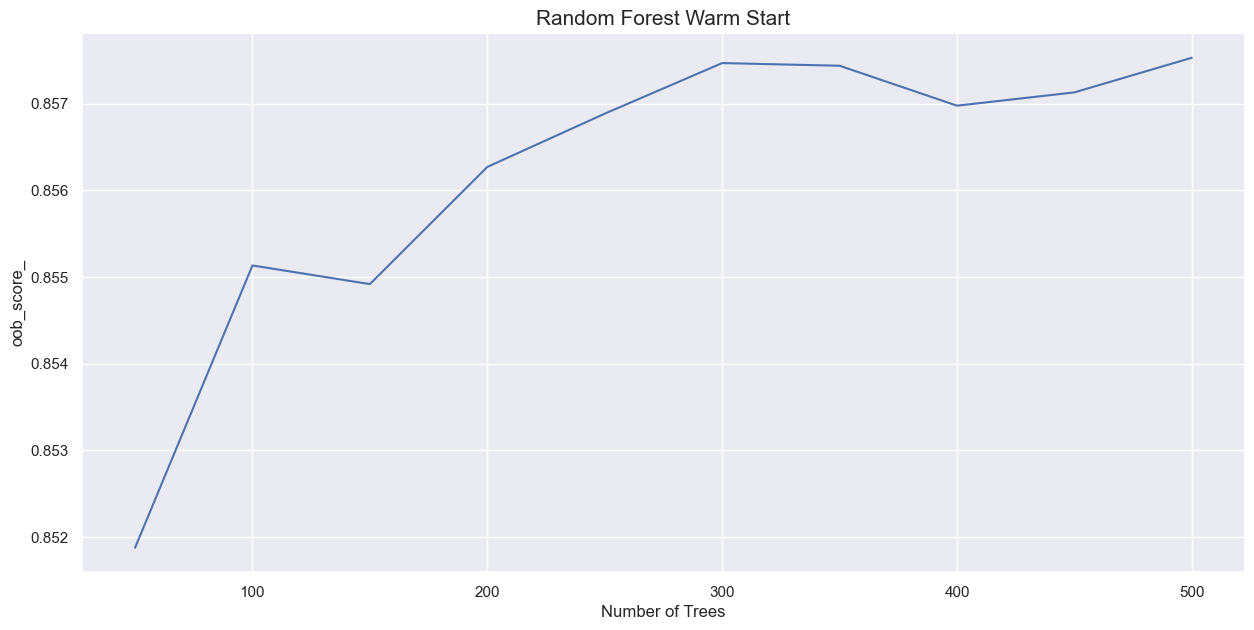

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn을 darkgrid로 설정합니다.
sns.set()

# 1. 초기화
## 1.1. 빈 oob_scores 리스트를 만듭니다.
oob_scores = []

## 1.2. n_estimators=50, warm_start=True, oob_score=True로 RandomForestClassifier 객체를 만듭니다.
rf = RandomForestClassifier(n_estimators=50, warm_start=True, 
                            oob_score=True, n_jobs=-1, random_state=2)

# 2. 모델 훈련
## 2.1. 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

## 2.2. rf.oob_score_를 oob_scores 리스트에 추가합니다.
oob_scores.append(rf.oob_score_)


# 3. 모델 저장
# est를 50으로 초기화합니다.
est = 50

# est로 estimators 리스트를 초기화합니다.
estimators=[est]

# 4. 위 과정 반복
# 0~9까지 반복합니다.
for i in range(9):
    
    # est에 50을 더합니다.
    est += 50
    
    # est를 estimators 리스트에 추가합니다.
    estimators.append(est)
    
    # n_estimators를 est로 설정합니다.
    rf.set_params(n_estimators=est)   ## point! 원하는 트리의 개수로 바꿔주면 됨!
    
    # 인구 조사 데이터셋으로 훈련합니다.
    rf.fit(X_census, y_census)
    
    # rf.oob_score를 oob_scores 리스트에 추가합니다.
    oob_scores.append(rf.oob_score_)

# 5. 시각화
plt.figure(figsize=(15,7))
# estimators와 oob_scores를 그래프로 그립니다.
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()

### 3.3.4. bootstrap
기본적으로 RF는 부트스트랩을 사용하고, 부트스트랩을 사용해야 `oob_score` 사용가능 함
+ 과소적합이 일어나는 경우 사용해 볼 수 있음

### 3.3.5. verbose
모델 구축 동안에 정보를 출력하는 정도를 설정할 수 있음
+ `default = 0`
+ 값을 키우면, 더 많은 정보를 출력 함
+ 대규모 모델의 경우 1을 추천

### 3.3.6. class_weight
`RandomForestClassifier` 는 클래스 별로 가중치를 부여할 수 있음
+ `default = None` : 가중치 부여 없음
+ `class_weight = {0:1, 1:2}` : 클래스0 : 클래스1 = 1:2 의 가중치를 가지게 됨
    + 가중치는 `fit()`을 호출할 때, `sample_weight`에 곱해져 사용됨

### 3.3.7. max_samples
개별 트리를 훈련하는 데 사용할 데이터 크기를 지정할 수 있는 옵션
+ `default = None` : 원본 훈련 세트와 동일한 크기의 부트스트램 샘플 생성
+  0~1 로 지정하거나, 정수로 지정하여, 훈련 데이터 크기를 지정할 수 있음

### 3.3.8. 결정 트리 매개변수
그 외의 변수들은 결정트리 매개변수에서 온 것들임
+ 랜덤 포레스트가 앙상블을 통해 모델의 분산을 줄이므로, 결정트리의 매개변수가 덜 중요해짐

#### 트리 깊이
+ `max_depth`
    + 트리의 분할 횟수를 결정, **항상 튜닝할 대상**

#### 분할
+ `max_features` : 분할에 사용할 특성 개수 제한
+ `min_samples_split` : 분할에 필요한 최소 샘플 개수 지정
+ `min_impurity_decrease` : 분할에 필요한 최소 불순도 감소량 지정


#### 리프 노드
+ `min_sample_leaf` : 리프 노드가 되기 위해 필요한 최소 샘플 개수 지정
+ `min_weight_fraction_leaf` : 리프 노드가 되기 위한 전체 가중치에 대한 최소 비율 지정

## 3.4. 랜덤포레스트 성능 높이기 - 사례연구
자전거 대여 회사를 위해서 날씨, 시간, 일자를 기반으로 일별 대여 횟수를 예측

### 3.4.1. 데이터 가져오기

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# bike_rentals_cleaned.csv 파일을 로드합니다.
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=42)

df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


### 3.4.2. n_estimators 적정값 찾기

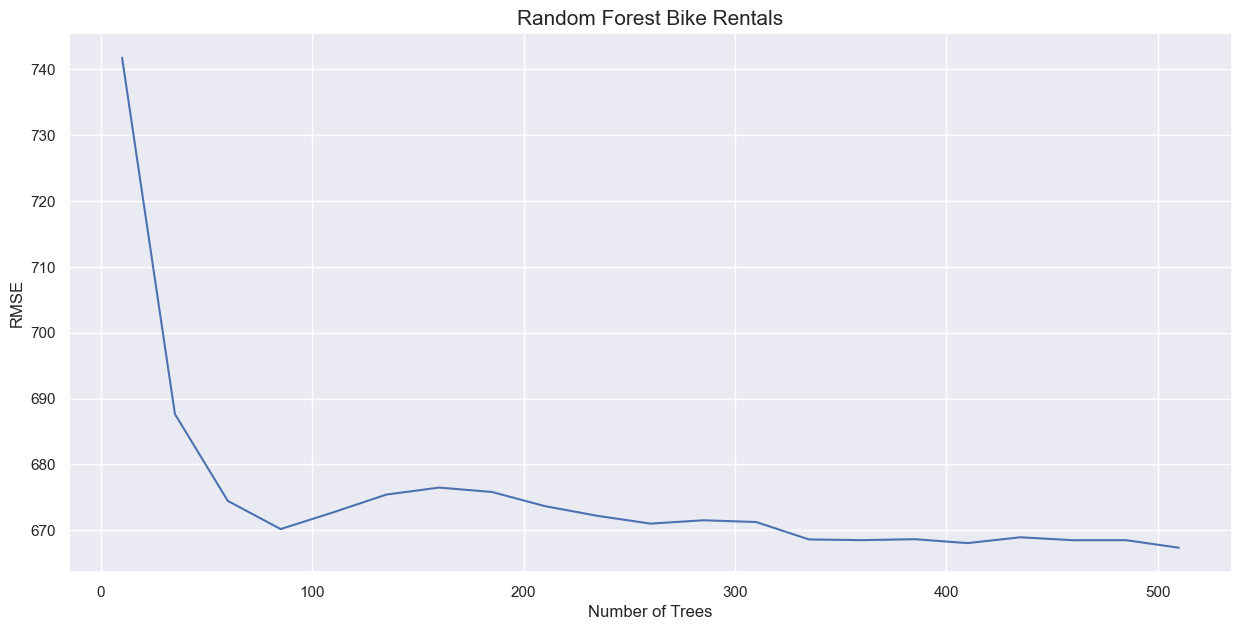

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# MSE 점수와 트리 개수를 담을 리스트
rmse_scores = []
estimators = []

# warm_start=True로 RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=42)

# 시작 트리 개수
est = 10

# 0~19까지 반복합니다.
for i in range(21):
    
    # n_estimators를 est로 설정합니다.
    rf.set_params(n_estimators=est)
    
    # 인구 조사 데이터셋으로 훈련합니다.
    rf.fit(X_train, y_train)
    
    # RMSE 값을 계산합니다.
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    # rmse와 est를 리스트에 추가합니다.
    rmse_scores.append(rmse)
    estimators.append(est)
    
    # 트리를 25개씩 늘립니다.
    est += 25

# 그래프 
plt.figure(figsize=(15,7))
# estimators와 rmse_scores를 그래프로 그립니다.
plt.plot(estimators, rmse_scores)
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Random Forest Bike Rentals', fontsize=15)
plt.show()

### 3.4.3. cross_val_score

In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import cross_val_score

# n_estimators=50, warm_start=True, oob_score=True로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=50, warm_start=True, 
                           n_jobs=-1, random_state=42)
   
# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes, 
                         scoring='neg_mean_squared_error', cv=10)
    
# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)
    
# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))
print('RMSE 중 마지막 SET 값이 매우 크다. 데이터에 이상치 있을 수 있다.')

RMSE: [ 816.801  574.178  534.37   811.655  874.146  784.807  870.913  765.784
  796.385 2156.599]
RMSE 평균: 898.564
RMSE 중 마지막 SET 값이 매우 크다. 데이터에 이상치 있을 수 있다.


### 3.4.4. 하이퍼파라미터튜닝
`RandomizedSearchCV` 이용해서 최상의 파라미터와 RMSE 점수 출력

In [5]:
# RandomizedSearchCV 임포트
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_reg(params, runs=12, 
                          reg=RandomForestRegressor(random_state=42, n_jobs=-1)):

    # RandomizedSearchCV 객체를 만듭니다.
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=10, n_jobs=-1, random_state=42)
    
    # X_train와 y_train로 grid_reg를 훈련합니다.
    rand_reg.fit(X_train, y_train)

    # 최상의 모델을 추출합니다.
    best_model = rand_reg.best_estimator_

    # 최상의 매개변수를 추출합니다.
    best_params = rand_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)
    
    # 최상의 점수를 구합니다.
    best_score = np.sqrt(-rand_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트의 레이블을 예측합니다.
    y_pred = best_model.predict(X_test)
    
    # mean_squared_error를 임포트합니다.
    from sklearn.metrics import mean_squared_error as MSE

    # rmse를 계산합니다.
    rmse_test = MSE(y_test, y_pred)**0.5

    # rmse를 출력합니다.
    print('테스트 세트 점수: {:.3f}'.format(rmse_test))
    
    return best_model

#### search1

In [7]:
params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
            'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
            'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,2,4,6,8,10,20],
             'n_estimators' : [50, 70, 80]}

randomized_search_reg(params = params, runs=20)

최상의 매개변수: {'n_estimators': 80, 'min_weight_fraction_leaf': 0.0025, 'min_samples_split': 0.01, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.2, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 8}
훈련 점수: 747.518
테스트 세트 점수: 740.787


RandomForestRegressor(max_depth=8, max_features='sqrt', max_leaf_nodes=30,
                      min_impurity_decrease=0.2, min_samples_leaf=6,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.0025,
                      n_estimators=80, n_jobs=-1, random_state=42)

#### search2

In [12]:
params={
#         'min_weight_fraction_leaf':[0.0, 0.0025, 0.005],
#             'min_samples_split':[ 0.01, 0.02, 0.03, 0.1],
            'min_samples_leaf':[4,6,10],
            'min_impurity_decrease':[0.05, 0.10,  0.2],
#             'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8, 0.5],
            'max_depth':[6,8,10, 12, 14, 16, None],
             'n_estimators' : [75, 80, 90, 100]
        }

randomized_search_reg(params = params, runs=20)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.2, 'max_features': 0.8, 'max_depth': 16}
훈련 점수: 707.597
테스트 세트 점수: 719.084


RandomForestRegressor(max_depth=16, max_features=0.8, min_impurity_decrease=0.2,
                      min_samples_leaf=4, n_jobs=-1, random_state=42)

#### search3

In [15]:
params={
#         'min_weight_fraction_leaf':[0.0, 0.0025, 0.005],
#             'min_samples_split':[ 0.01],
            'min_samples_leaf':[4,6, 10],
            'min_impurity_decrease':[0.05, 0.1],
#             'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8],
            'max_depth':[6,8,10, 12, 14 , None],
             'n_estimators' : [80,85, 90, 95,100]
        }

randomized_search_reg(params = params, runs=25)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.1, 'max_features': 'sqrt', 'max_depth': 10}
훈련 점수: 708.049
테스트 세트 점수: 701.931


RandomForestRegressor(max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0.1, min_samples_leaf=4, n_jobs=-1,
                      random_state=42)

#### best model's cross validation score

In [16]:
# n_estimators=100, oob_score=True으로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, 
                           max_features='sqrt', max_depth=10, n_jobs=-1, 
                           random_state=42)
   
# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes, 
                         scoring='neg_mean_squared_error', cv=10)
    
# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)
    
# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 928.634  561.957  558.773  796.271  782.3    784.672  955.393  769.618
  747.969 1445.983]
RMSE 평균: 833.157


#### data shuffle

In [18]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [21]:
from sklearn.utils import shuffle
df_shuffle_bikes = shuffle(df_bikes, random_state=42)

# 데이터를 X와 y로 나눕니다.
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]

df_shuffle_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
703,704,4.0,1.0,12.0,0.0,2.0,1.0,1,0.475833,0.469054,0.733750,0.174129,6606
33,34,1.0,0.0,2.0,0.0,4.0,1.0,1,0.186957,0.177878,0.437826,0.277752,1550
300,301,4.0,0.0,10.0,0.0,5.0,1.0,2,0.330833,0.318812,0.585833,0.229479,3747
456,457,2.0,1.0,4.0,0.0,0.0,0.0,2,0.425833,0.417287,0.676250,0.172267,6041
633,634,4.0,1.0,9.0,0.0,2.0,1.0,1,0.550000,0.544179,0.570000,0.236321,7538


In [22]:
# n_estimators=100, oob_score=True으로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, 
                           max_features='sqrt', max_depth=10, n_jobs=-1, 
                           random_state=42)
   
# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, 
                         scoring='neg_mean_squared_error', cv=10)
    
# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)
    
# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [563.417 804.577 543.814 676.685 607.256 793.304 617.062 727.675 529.817
 589.245]
RMSE 평균: 645.285


## 부록. ExtraTreesClassifier & ExtraTreesRegressor
+ 랜덤 포레스트와 모든 매개변수를 동일하게 제공함
+ 랜덤 포레스트와 차이점
    + 부트스트랩을 사용하지 않음
    + 랜덤하게 노드를 분할하는 결정 트리 ( `DecisionTreeClassifier(splitter='random')` ) 를 사용
    + 특성마다 랜덤하게 분할한 다음 그 중에 최선의 분할을 찾아 노드를 분할함

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)
cv_results = cross_validate(et, X_train, y_train)

print('교차 검증 평균 점수:', np.mean(cv_results['test_score']))

교차 검증 평균 점수: 0.8383701883701884
